In [1]:
import sys, os

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.insert(0, project_root)

import pandas as pd
import numpy as np

from models import rf_model
from training import ModelTrainer, MLflowLogger

## Read Data

In [2]:
df = pd.read_csv('../data/train.csv', index_col='ID')
df.head()

,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
ID,,,,,,,,,,,,,,,,,,,,,
0,130.81,k,v,at,a,d,u,j,o,0,...,0,0,1,0,0,0,0,0,0,0
6,88.53,k,t,av,e,d,y,l,o,0,...,1,0,0,0,0,0,0,0,0,0
7,76.26,az,w,n,c,d,x,j,x,0,...,0,0,0,0,0,0,1,0,0,0
9,80.62,az,t,n,f,d,x,l,e,0,...,0,0,0,0,0,0,0,0,0,0
13,78.02,az,v,n,f,d,h,d,n,0,...,0,0,0,0,0,0,0,0,0,0


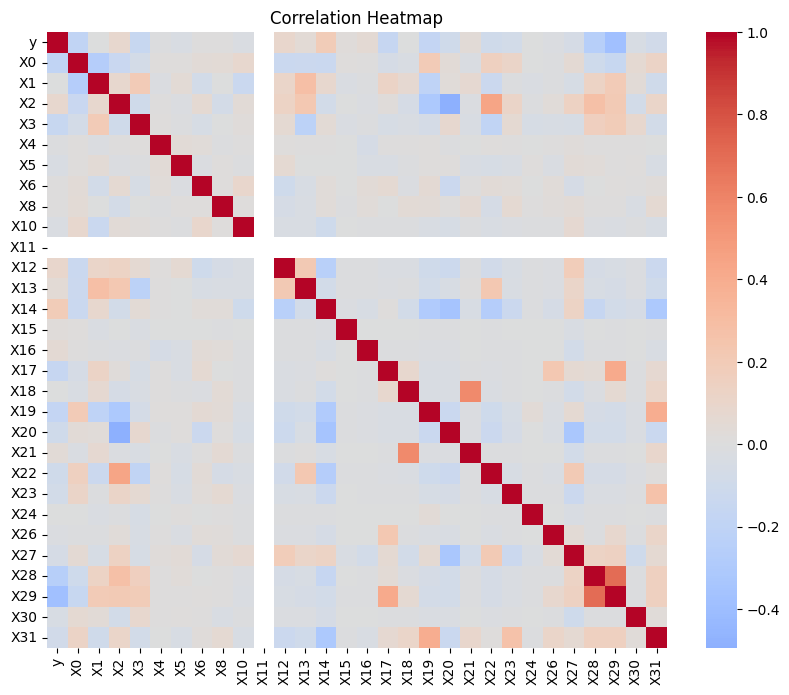

In [25]:
from visualization import plot_correlation_heatmap

plot_correlation_heatmap(df.iloc[:, :30])

## Preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
categorical_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']

In [5]:
encoder_dict = {}
for col in categorical_features:
    encoder_dict[col] = LabelEncoder().fit(df[col])
    df[col] = encoder_dict[col].transform(df[col])

## Data Splitting

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop(columns=['y']).copy()
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Model Training

In [8]:
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model_config = {
    'n_estimators': 500,
    'max_depth': 6,
    'max_features': 0.8,
    'bootstrap': True,
    'max_samples': 0.8
}

In [10]:
rf_clf = rf_model.RandomForestModel(
    config=model_config,
    feature_names=X_train.columns.to_list()
)

trainer = ModelTrainer(
    model=rf_clf,
    params=model_config,
    metrics={
        'mse': mean_squared_error,
        'r2': r2_score
    }, 
    mlflow_logger=MLflowLogger()
)

In [12]:
trainer.train(
    X_train,
    y_train,
    log=True,
    run_name='Random Forest Regressor Test Run',
    model_name='RF_Regressor',
    description='Random Forest Regressor Class Test Run'
)

In [13]:
trainer.evaluate_many(
    datasets={
        'train': (X_train, y_train),
        'validation': (X_test, y_test)
    }
)

{'train': {'mse': 61.4202159414742, 'r2': 0.6192780461976946},
 'validation': {'mse': 70.81612469640784, 'r2': 0.5544347227259456}}

## Plots

In [ ]:
from visualization import plot_residuals, plot_shap_values

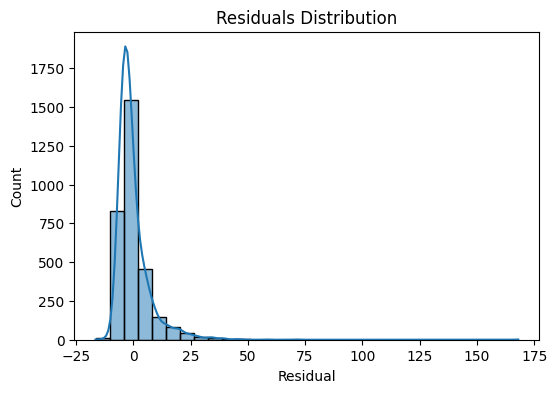

In [19]:
plot_residuals(y_train, trainer.predict(X_train))

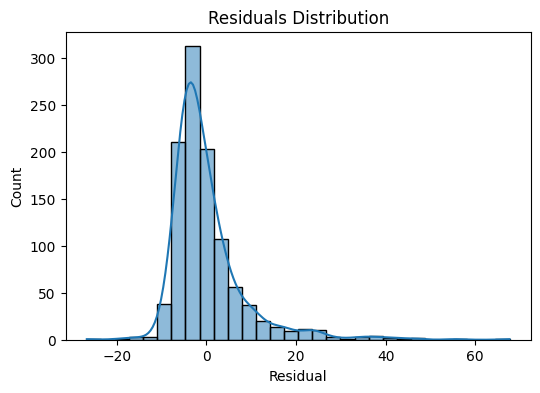

In [20]:
plot_residuals(y_test, trainer.predict(X_test))

In [ ]:
## !! RF model doesn't support tree explainer method from shape

# plot_shap_values(trainer.model, X_train, max_display=15)